## 1. 해쉬 구조
- Hash Table : Key에 Value를 저장하는 데이터 구조 
    - Key를 통해서 바로 데이터 받을 수 있음, 속도가 획기적으로 빨라짐 
    - 파이썬 Dictionary가 해쉬 테이블의 예
    - 보통 배열로 미리 해쉬 테이블 사이즈만큼 생성한 후에 사용(공간과 탐색 시간을 맞바꿈)
    - 파이썬에서는 해쉬를 별도 구현할 필요 없이 딕셔너리 타입 사용하면 됨 


## 2. 알아둘 용어
- 해쉬(Hash) : 임의의 값을 고정 길이로 변환하는 것 
- 해쉬 테이블(Hash Table) : 키 값의 연산에 의해 직접 접근이 가능한 데이터 구조
- 해싱 함수(Hashing function) : Key에 대해 산술 연산을 이용해 데이터 위치를 찾을 수 있는 함수
- 해쉬 값(Hash Value) 또는 해쉬 주소(Hash address) : Key를 해싱 함수로 연산해서 해쉬 값을 알아내고 이를 기반으로 해쉬 테이블에서 Key에 대한 위치를 연관성있게 찾을 수 있음
- 슬롯(Slot) : 한 개의 데이터를 저장할 수 있는 공간
- 저장할 데이터에 대해 Key를 추출할 수 있는 별도 함수도 존재할 수 있음 

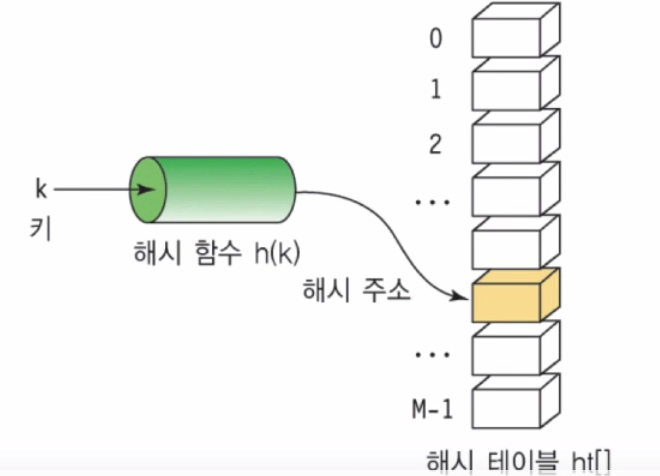

### 3.1 hash table 만들기
- 참고 : 파이썬 list comprehension : https://fun-coding.org/PL&OOP5-2.html

In [2]:
hash_table = list([i for i in range(10)])
hash_table

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3.2 간단한 해쉬 함수
- 다양한 해쉬 함수 고안 기법이 있어며 가장 간단한 방식이 Division법(나누기를 통한 나머지 값을 이용)

In [18]:
def hash_func(key) : 
    return key%5

### 3.3 해쉬 테이블에 저장
- 데이터에 따라 필요시 key 생성 방법 정의가 필요

In [19]:
data1 = 'Andy'
data2 = 'Dave'
data3 = 'Trump'

# ord() : 해당 문자의 ASCII code return (Unicode이전에 사용)
print(ord(data1[0]), ord(data2[0]), ord(data3[0]))
print(ord(data1[0]), hash_func(ord(data1[0])))

65 68 84
65 0


#### 3.3.2 해쉬 테이블에 값 저장 예시
- data : value와 같이 data와 value를 넣으면 해당 data에 대한 key를 찾아서 해당 key에 대응하는 해쉬 주소에 value를 저장하는 예

In [20]:
def storage_data(data, value) : # storage_data function에 원하는 데이터와 저장하고싶은 값을 넣으면
    key = ord(data[0]) # data를 이용해서 key값 생성 
    hash_address = hash_func(key) # key를 이용해서 hash address를 생성
    hash_table[hash_address] = value # hash address를 통해서 slot에 저장

### 3.4 해쉬 테이블에서 특정 주소의 데이터를 가져오는 함수 생성

In [21]:
storage_data('Andy', '01055553333')
storage_data('Dave', '01044443333')
storage_data('Trump', '01022223333')

### 3.5 실제 데이터 저장하고 읽기

In [24]:
def get_data(data) : 
    key = ord(data[0])
    hash_address = hash_func(key)
    return hash_table[hash_address]

In [26]:
get_data('Andy')

'01055553333'

## 4. 자료 구조 해쉬 테이블의 장점과 주요 용도
- 장점 
    - 데이터 저장/읽기 속도가 빠르다
    - 해쉬는 키에 대한 데이터가 있는지(중복) 확인이 쉽다.

- 단점 
    - 일반적으로 저장공간이 좀 더 많이 필요하다.
    - **여러 키에 해당하는 주소가 동일한 경우 충돌을 해결하기 위한 별도 자료구조가 필요**
- 주요 용도
    - 검색이 많이 필요한 경우
    - 저장, 삭제, 읽기가 빈번한 경우
    - 캐쉬 구현 시(중복 확인이 쉽기 때문)

## 5. 연습
- 연습 1 : 리스트 변수를 활용해서 해쉬 테이블 구현해보기
    - 해쉬 함수 : key%8
    - 해쉬 키 생성 : hash(data)

In [32]:
hash("Dave")

1940639785027722783

In [33]:
hash_table = list([0 for i in range(8)])

def get_key(data) : 
    return hash(data)

def hash_function(key) : 
    return key%8

def save_data(data, value) : 
    hash_address = hash_function(get_key(data))
    hash_table[hash_address] = value
    
def read_data(data) : 
    hash_address = hash_function(get_key(data))
    return hash_table[hash_address]

In [34]:
save_data('Dave', '0102030200')
save_data('Andy', '0103323220')
read_data('Dave')

'0102030200'

## 6. 충돌(Collision) 해결 알고리즘(좋은 해쉬 함수 사용하기)
- 해쉬 함수의 가장 큰 문제는 충돌의 경우이다. (Collision / Hash Collision)

### 6.1 chaining 기법
- 개방 해싱(또는 Open Hashing)기법 중 하나 : 해쉬 테이블 저장공간 외의 공간을 활용하는 기법 
- 충돌이 일어나면 링크드 리스트라는 자료 구조를 사용해서 링크드 리스트로 데이터를 추가로 뒤에 연결시켜서 저장하는 기법

- 연습 2: 연습 1의 해쉬 테이블 코드에 Chaining 기법으로 충돌해결 코드를 추가
    - 1. 해쉬 함수 : key % 8
    - 2. 해쉬 키 생성 : hash(data)

In [44]:
hash_table = list([0 for i in range(8)])
def get_key(data) : 
    return hash(data)

def hash_function(key) : 
    return key % 8

def save_data(data, value) : 
    index_key = get_key(data)
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0 : 
        for index in range(len(hash_table[hash_address])) : 
            if hash_table[hash_address][index][0] == index_key : 
                hash_table[hash_address][index][1] = value
                return
        hash_table[hash_address].append([index_key, value])
    else : 
        hash_table[hash_address] = [[index_key, value]]
        
def read_data(data) : 
    index_key = get_key(data)
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0 : 
        for index in range(len(hash_table[hash_address])) : 
            if hash_table[hash_address][index][0] == index_key : 
                return hash_table[hash_address][index][1]
        return None
    else : 
        return None

In [45]:
print(hash('Dave') % 8 )
print(hash('David') % 8 )

7
7


In [46]:
save_data('Dave', '1201023010')
save_data('David', '3301023210')


'1201023010'

In [47]:
read_data('Dave')

'1201023010'

In [48]:
read_data('David')

'3301023210'

In [49]:
hash_table

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 [[1940639785027722783, '1201023010'], [4228809181234726367, '3301023210']]]

### 6.2 Linear Probing 기법 
- 폐쇄 해싱(또는 Closed Hashing) 기법 중 하나 : 해쉬 테이블 저장공간 안에서 충돌 문제를 해결하는 기법 
- 충돌이 일어나면 해당 hash address의 다음 address부터 맨 처음 나오는 빈공간에 저장하는 기법 
    - **저장공간 활용도**를 높이기 위한 기법

- 연습 3: 연습 1의 해쉬 테이블 코드에 Linear Probing 기법으로 충돌해결 코드를 추가해보기 
    - 해쉬 함수 : key % 8
    - 해쉬 키 생성 : hash(data)

In [111]:
hash_table = list([0 for i in range(8)])

In [82]:
def get_key(data) : 
    return hash(data)

def hash_function(key) : 
    return key % 8 

def save_data(data, value) : 
    index_key = get_key(data) 
    hash_address = hash_function(index_key) 
    
    if hash_table[hash_address] != 0 : # hash address에 data가 저장되어 있다는 의미
        for index in range(hash_address, len(hash_table)) : 
            if hash_table[index] == 0 : 
                hash_table[index] = [index_key, value]
                return
            elif hash_table[index][0] == index_key : 
                hash_table[index][1] = value # update           
                return
        
    else : 
        hash_table[hash_address] = [index_key, value]
            
def read_data(data) : 
    index_key = get_key(data) 
    hash_address = hash_function(index_key) 
    
    if hash_table[hash_address] != 0 :
        for index in range(hash_address, len(hash_table)) : 
            if hash_table[index] == 0 : # data 가 저장된 적이 없음을 의미
                    return None 
            elif hash_table[index][0] == index_key : 
                return hash_table[index][1]

    else : 
        return None

In [112]:
print(hash('Dadd')%8)
print(hash('Mommy')%8)

6
6


In [113]:
save_data('Dadd', '0135460')
save_data('Mommy', '12235435')

In [115]:
read_data('Dadd')

'0135460'

In [114]:
hash_table

[0,
 0,
 0,
 0,
 0,
 0,
 [-2482625959367868298, '0135460'],
 [7529898409017496574, '12235435']]

In [116]:
read_data('Mommy')

'12235435'

### 6.3 빈번한 충돌을 피하는 기법 
- 해쉬 함수를 재정의하거나 해쉬 테이블 저장공간을 확대
- 예 : 
```python
hash_table = list([None for i in range(16)])
```
```python
def hash_function(key) : 
    key % 16
```

### 참고 : 해쉬 함수와 키 생성 함수 
- 파이썬의 hash() 함수는 실행할 때마다 값이 달라질 수 있다. 
- 유명한 해쉬 함수들이 있음 : SHA(Secure Hash Algorithm, 안전한 해쉬 알고리즘)
    - 어떤 데이터라도 유일한 고정된 크기의 고정값을 리턴해주므로 해쉬 함수로 유용하게 활용 가능 

#### SHA-1 

In [120]:
import hashlib 

data = 'test'.encode()
hash_object = hashlib.sha1()
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print(hex_dig)

a94a8fe5ccb19ba61c4c0873d391e987982fbbd3


### SHA-256

In [121]:
import hashlib 

data = 'test'.encode()
hash_object = hashlib.sha256()
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print(hex_dig)

9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08


- 연습 4 : 연습 2의 Chaining 기법을 적용한 해쉬 테이블 코드에 키 생성 함수를 sha256 해쉬 알고리즘을 사용하도록 변경해보기
    - 해쉬 함수 : key % 8 
    - 해쉬 키 생성 : hash(data)

In [143]:
hash_table = list([0 for i in range(8)])

In [144]:
def get_key(data) : 
    hash_object = hashlib.sha256()
    hash_object.update(data.encode())
    hex_dig = hash_object.hexdigest()
    return int(hex_dig, 16)

def hash_function(key) : 
    return key % 8 

def save_data(data, value) : 
    index_key = get_key(data) 
    hash_address = hash_function(index_key) 
    
    if hash_table[hash_address] != 0 : # hash address에 data가 저장되어 있다는 의미
        for index in range(hash_address, len(hash_table)) : 
            if hash_table[index] == 0 : 
                hash_table[index] = [index_key, value]
                return
            elif hash_table[index][0] == index_key : 
                hash_table[index][1] = value # update           
                return
        
    else : 
        hash_table[hash_address] = [index_key, value]
            
def read_data(data) : 
    index_key = get_key(data) 
    hash_address = hash_function(index_key) 
    
    if hash_table[hash_address] != 0 :
        for index in range(hash_address, len(hash_table)) : 
            if hash_table[index] == 0 : # data 가 저장된 적이 없음을 의미
                    return None 
            elif hash_table[index][0] == index_key : 
                return hash_table[index][1]

    else : 
        return None

In [145]:
print(get_key('sister')%8)
print(get_key('mother')%8)

5
5


In [146]:
save_data('sister', '123123123')
save_data('mother', '678678678')

In [147]:
read_data('sister')

'123123123'

In [148]:
read_data('mother')

'678678678'

## 7.시간 복잡도
- 일반적인 경우(No Collision) : O(1)
- 최악의 경우(Collision이 모두 발생하는 경우) : O(n)
    
> 해쉬 테이블의 경우 일반적인 경우를 기대하고 만들기 때문에 시간 복잡도는 O(1)이라고 할 수 있음 

### 검색에서 해쉬 테이블의 사용 예 
- 16개의 배열에 데이터를 저장하고 검색할 때 O(n)
- 16개의 데이터 저장공간을 가진 위의 해쉬 테이블에 데이터를 저장하고 검색할 때 O(1)